# **theLook eCommerce Data Analysis with Python**


---


## Install the required libraries

In [1]:
!pip install pandas matplotlib

### Import the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Mounted google.colab with google.drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import csv data from google.drive

csv data: https://drive.google.com/file/d/16mRDjVGWvq1G5Fqlxf-fuDYHpUv0szPi/view?usp=sharing

df is a dataframe of theLook eCommerce

In [4]:
file_path = '/content/drive/My Drive/bq-results-20240911-033404-1726025664657/bq-results-20240911-033404-1726025664657.csv'
df = pd.read_csv(file_path)

Show top 5 of the data

In [5]:
df.head()

,customer_id,customer_name,age,gender,country,traffic_source,order_id,order_created_date,status,product_id,product_category,product_name,product_brand,num_of_item,sale_price
0,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00 UTC,Complete,14951.0,Maternity,Maternity Holdup Suspenders Worn Under Materni...,Hold-Up Suspender Co.,1.0,18.950001
1,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00 UTC,Complete,14548.0,Maternity,Three Seasons Maternity Women's 3/4 Sleeve Sol...,Three Seasons Maternity,1.0,32.000000
2,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00 UTC,Complete,15217.0,Maternity,Womens Maternity Two Piece Tankini Bikini Swim...,COCO,1.0,44.990002
3,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00 UTC,Complete,2010.0,Fashion Hoodies & Sweatshirts,O'Neill Juniors Jackson Pullover Sweatshirt,O'Neill,1.0,50.000000
4,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00 UTC,Complete,12029.0,Intimates,Frederick's of Hollywood Hollywood Dream Full-...,Frederick's of Hollywood,1.0,62.000000


Number of duplicated rows

In [6]:
df.duplicated().sum()

42

Create a new variable which is a dataframe with duplicate rows of data removed.

In [7]:
df_cleaned = df.drop_duplicates()

Reset index of the data

In [8]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391510 entries, 0 to 391509
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         391510 non-null  int64  
 1   customer_name       391510 non-null  object 
 2   age                 391510 non-null  int64  
 3   gender              391510 non-null  object 
 4   country             391510 non-null  object 
 5   traffic_source      391510 non-null  object 
 6   order_id            371329 non-null  float64
 7   order_created_date  371329 non-null  object 
 8   status              371329 non-null  object 
 9   product_id          371329 non-null  float64
 10  product_category    371329 non-null  object 
 11  product_name        371308 non-null  object 
 12  product_brand       370995 non-null  object 
 13  num_of_item         371329 non-null  float64
 14  sale_price          371329 non-null  float64
dtypes: float64(4), int64(2), object(9)

Convert 'order_created_date' data type, from string to datetime.

In [10]:
# Convert to datetime, including handling microseconds and timezone
df_cleaned['order_created_date'] = pd.to_datetime(df_cleaned['order_created_date'], errors='coerce', utc=True)

# Remove microseconds if needed
df_cleaned['order_created_date'] = df_cleaned['order_created_date'].dt.floor('S')

df_cleaned.head()

,customer_id,customer_name,age,gender,country,traffic_source,order_id,order_created_date,status,product_id,product_category,product_name,product_brand,num_of_item,sale_price
0,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,14951.0,Maternity,Maternity Holdup Suspenders Worn Under Materni...,Hold-Up Suspender Co.,1.0,18.950001
1,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,14548.0,Maternity,Three Seasons Maternity Women's 3/4 Sleeve Sol...,Three Seasons Maternity,1.0,32.000000
2,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,15217.0,Maternity,Womens Maternity Two Piece Tankini Bikini Swim...,COCO,1.0,44.990002
3,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,2010.0,Fashion Hoodies & Sweatshirts,O'Neill Juniors Jackson Pullover Sweatshirt,O'Neill,1.0,50.000000
4,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,12029.0,Intimates,Frederick's of Hollywood Hollywood Dream Full-...,Frederick's of Hollywood,1.0,62.000000


Show the information of dataframe after the converting 'order_created_date' data type.

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391510 entries, 0 to 391509
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   customer_id         391510 non-null  int64              
 1   customer_name       391510 non-null  object             
 2   age                 391510 non-null  int64              
 3   gender              391510 non-null  object             
 4   country             391510 non-null  object             
 5   traffic_source      391510 non-null  object             
 6   order_id            371329 non-null  float64            
 7   order_created_date  361350 non-null  datetime64[ns, UTC]
 8   status              371329 non-null  object             
 9   product_id          371329 non-null  float64            
 10  product_category    371329 non-null  object             
 11  product_name        371308 non-null  object             
 12  product_brand   

Create a new column 'revenue' which is the result of multiplying 'num_of_item' and 'sale_price'.

In [12]:
df_cleaned['revenue'] = df_cleaned['num_of_item'] * df_cleaned['sale_price']

df_cleaned.head()

,customer_id,customer_name,age,gender,country,traffic_source,order_id,order_created_date,status,product_id,product_category,product_name,product_brand,num_of_item,sale_price,revenue
0,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,14951.0,Maternity,Maternity Holdup Suspenders Worn Under Materni...,Hold-Up Suspender Co.,1.0,18.950001,18.950001
1,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,14548.0,Maternity,Three Seasons Maternity Women's 3/4 Sleeve Sol...,Three Seasons Maternity,1.0,32.000000,32.000000
2,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,15217.0,Maternity,Womens Maternity Two Piece Tankini Bikini Swim...,COCO,1.0,44.990002,44.990002
3,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,2010.0,Fashion Hoodies & Sweatshirts,O'Neill Juniors Jackson Pullover Sweatshirt,O'Neill,1.0,50.000000,50.000000
4,1535,Tonya Martin,56,F,Brasil,Search,1882.0,2023-10-27 09:03:00+00:00,Complete,12029.0,Intimates,Frederick's of Hollywood Hollywood Dream Full-...,Frederick's of Hollywood,1.0,62.000000,62.000000


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391510 entries, 0 to 391509
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   customer_id         391510 non-null  int64              
 1   customer_name       391510 non-null  object             
 2   age                 391510 non-null  int64              
 3   gender              391510 non-null  object             
 4   country             391510 non-null  object             
 5   traffic_source      391510 non-null  object             
 6   order_id            371329 non-null  float64            
 7   order_created_date  361350 non-null  datetime64[ns, UTC]
 8   status              371329 non-null  object             
 9   product_id          371329 non-null  float64            
 10  product_category    371329 non-null  object             
 11  product_name        371308 non-null  object             
 12  product_brand   

Check if there are any errors in the writing of the data.

In [14]:
for col_name in ['gender', 'country', 'traffic_source', 'status', 'product_category', 'product_name', 'product_brand']:
    print(df_cleaned[col_name].value_counts(), '\n')

gender
F    196033
M    195477
Name: count, dtype: int64 

country
China             134002
United States      87498
Brasil             56817
South Korea        20802
France             19442
United Kingdom     17351
Germany            16763
Spain              15767
Japan               9686
Australia           7550
Belgium             5032
Poland               748
Colombia              38
Austria               12
España                 2
Name: count, dtype: int64 

traffic_source
Search      273215
Organic      59080
Facebook     23784
Email        19821
Display      15610
Name: count, dtype: int64 

status
Shipped       111830
Complete       92920
Processing     73791
Cancelled      55698
Returned       37090
Name: count, dtype: int64 

product_category
Intimates                        27037
Jeans                            25698
Tops & Tees                      24502
Fashion Hoodies & Sweatshirts    24300
Swim                             22970
Shorts                           22917
S

Check if there are any null data

In [15]:
df_cleaned.isnull().sum()

,0
customer_id,0
customer_name,0
age,0
gender,0
country,0
traffic_source,0
order_id,20181
order_created_date,30160
status,20181
product_id,20181


Delete the rows that contain null data in 'revenue' column

In [16]:
df_cleaned_revenue = df_cleaned.dropna(subset=['revenue'])

Reset the index of the data frame

In [17]:
df_cleaned_revenue = df_cleaned_revenue.reset_index(drop=True)

In [18]:
df_cleaned_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371329 entries, 0 to 371328
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   customer_id         371329 non-null  int64              
 1   customer_name       371329 non-null  object             
 2   age                 371329 non-null  int64              
 3   gender              371329 non-null  object             
 4   country             371329 non-null  object             
 5   traffic_source      371329 non-null  object             
 6   order_id            371329 non-null  float64            
 7   order_created_date  361350 non-null  datetime64[ns, UTC]
 8   status              371329 non-null  object             
 9   product_id          371329 non-null  float64            
 10  product_category    371329 non-null  object             
 11  product_name        371308 non-null  object             
 12  product_brand   

## Overall Performance

### 1. What is the total revenue received by theLook eCommerce?


---


**$ 36,929,064.9**

---



In [19]:
df_cleaned_revenue['revenue'].sum()

36929064.86630914

### 2. How many customers does theLook eCommerce have?


---
**100,000**


---




In [20]:
df_cleaned['customer_id'].nunique()

100000

### 3. How many orders does theLook eCommerce have?


---
**125,056**


---




In [21]:
df_cleaned['order_id'].nunique()

125056

### 4. How many lost order opportunities does theLook eCommerce have?


---
**31,337**


---




In [22]:
df_cleaned[df_cleaned['status'].isin(['Cancelled', 'Returned'])]['order_id'].nunique()

31337

## Deep Dive Analysis

### 1. What is the annual revenue trend for theLook eCommerce?

In [23]:
df_cleaned_revenue['year']=df_cleaned_revenue['order_created_date'].dt.year
print(df_cleaned_revenue['year'].unique())

[2023. 2024. 2022. 2021. 2020.   nan 2019.]


In [24]:
# Change NaN value in 'year' column to 'Unknown'
df_cleaned_revenue['year'] = df_cleaned_revenue['year'].fillna('Unknown')

# Convert the 'year' data type that is not 'Unknown' to integer
df_cleaned_revenue['year'] = df_cleaned_revenue['year'].apply(lambda x: int(x) if x != 'Unknown' else x)

print(df_cleaned_revenue['year'].unique())

[2023 2024 2022 2021 2020 'Unknown' 2019]


In [25]:
annual_revenue = df_cleaned_revenue.groupby('year')['revenue'].sum().round(2)  # Round into two decimal
annual_revenue

,revenue
year,
2019,590099.09
2020,1971013.93
2021,3671159.85
2022,6040028.05
2023,9991973.19
2024,13635235.59
Unknown,1029555.16


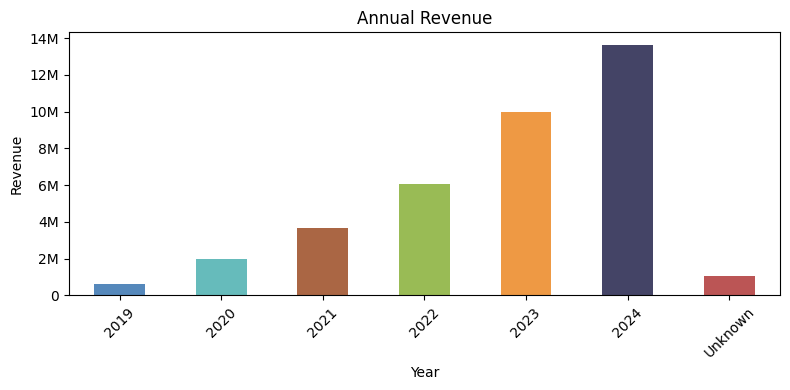

In [26]:
# Define different colors for each bar
colors = ['#5588bb', '#66bbbb', '#aa6644', '#99bb55', '#ee9944', '#444466', '#bb5555']

# Bar chart plot
plt.figure(figsize=(8, 4))
annual_revenue.plot(kind='bar', color=colors)

# Adding a title and label
plt.title('Annual Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')

# Change format y-axis in %%M (%% million)
def format_million(x, pos):
    if x >= 1e6:
        return '{:.0f}M'.format(x * 1e-6)
    else:
        return '{:.0f}'.format(x)

formatter = ticker.FuncFormatter(format_million)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the revenue data across the years:

1. **Steady Growth**: theLook eCommerce shows a clear upward trend in revenue from 2019 to 2024. Starting from about 590,099 in 2019, revenue has grown each year, reaching 13.6 million by 2024.
   
2. **Significant Jumps in Revenue**: The most notable jumps in revenue occur between:
   - 2019 to 2020, with an increase of about 233% (from 590k to 1.97M).
   - 2023 to 2024, where revenue jumped from 9.99M to 13.6M, a 36% increase.
   
3. **Unknown Revenue Source**: There is 1.03M attributed to "Unknown" in the year column, indicating either incomplete data or unclassified transactions. This is a significant amount, and further investigation into its source or reclassification could help clarify the trend.

4. **Exponential Growth**: From 2019 to 2024, the company’s revenue has multiplied by over 23 times, indicating a very successful expansion or growth strategy during this period.

Overall, theLook eCommerce has demonstrated rapid growth, with particularly strong revenue increases in 2023 and 2024. However, attention should be given to the "Unknown" category, as it represents over 1 million in revenue.

### 2. How is the performance of the traffic sources owned by theLook eCommerce?

In [27]:
traffic_source = df_cleaned_revenue.groupby('traffic_source')['revenue'].sum().round(2).sort_values(ascending=False)
traffic_source

,revenue
traffic_source,
Search,25850433.32
Organic,5591551.91
Facebook,2177106.22
Email,1883397.42
Display,1426575.99


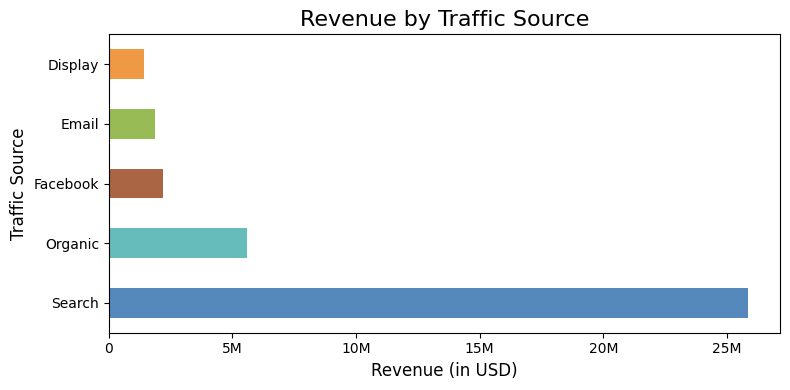

In [43]:
# Plotting the bar chart
plt.figure(figsize=(8, 4))
traffic_source.plot(kind='barh', color=colors[:len(traffic_source)])  # Adjust colors to the length of the data

# Adding labels and title
plt.title('Revenue by Traffic Source', fontsize=16)
plt.xlabel('Revenue (in USD)', fontsize=12)
plt.ylabel('Traffic Source', fontsize=12)

# Change format y-axis in %%M (%% million)
def format_million_h(y, pos):
    if y >= 1e6:
        return '{:.0f}M'.format(y * 1e-6)
    else:
        return '{:.0f}'.format(y)
formatter = ticker.FuncFormatter(format_million_h)
plt.gca().xaxis.set_major_formatter(formatter)

# Display the plot
plt.tight_layout()
plt.show()

From the data, here are some insights:

1. **Search Dominates Revenue Generation**: The "Search" traffic source contributes the most revenue, with 25.85 million, significantly higher than the other channels. This suggests that search engine marketing (e.g., Google Ads or SEO) is a key driver of sales for theLook Ecommerce.
   
2. **Organic and Paid Channels**: After "Search", "Organic" traffic generates 5.59 million in revenue, indicating a strong presence from organic, non-paid sources such as search engine results or direct visits. It's notable that this source brings in more revenue than paid channels like Facebook or Email, underscoring the importance of maintaining strong SEO and brand loyalty.

3. **Social Media Channels**: "Facebook" contributes 2.17 million, which is substantial, but lower than organic and search. This shows that while social media is valuable for revenue, it is not as powerful as search-driven methods for this business.

4. **Email and Display Ads Have Lower Impact**: "Email" marketing brings in 1.88 million, while "Display" ads (likely banner ads or remarketing campaigns) bring in the lowest, at 1.43 million. These channels may need to be optimized or scaled for better returns or potentially integrated into multi-channel strategies to enhance their impact.

The data suggests that **Search** and **Organic** traffic should remain the focus, while there is potential to experiment with improving performance in lower-performing channels like **Email** and **Display**.

### 3. What are the top 5 product categories based on total orders in theLook eCommerce?

In [29]:
top_5_product_categories = df_cleaned.groupby('product_category')['order_id'].nunique().sort_values(ascending=False).head(5)
top_5_product_categories

,order_id
product_category,
Jeans,22952
Fashion Hoodies & Sweatshirts,21983
Intimates,21918
Tops & Tees,21815
Swim,20771


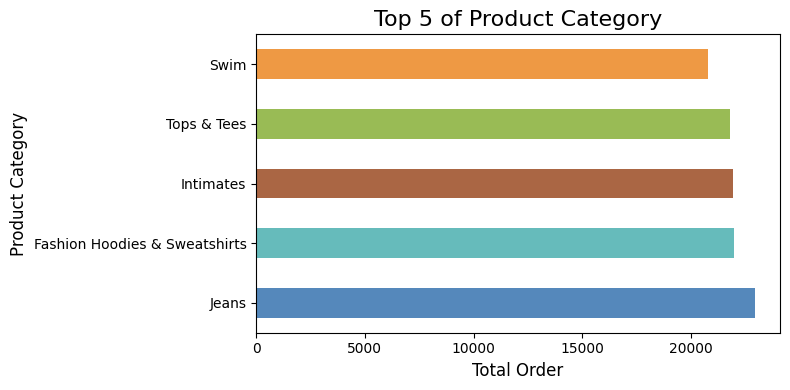

In [38]:
# Plotting the bar chart
plt.figure(figsize=(8, 4))
top_5_product_categories.plot(kind='barh', color=colors[:len(top_5_product_categories)])  # Adjust colors to the length of the data

# Adding labels and title
plt.title('Top 5 of Product Category', fontsize=16)
plt.xlabel('Total Order', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Here are insights from the data:

1. **Jeans as the Top-Selling Category**: With 22,952 orders, "Jeans" is the most popular product category for theLook eCommerce. This suggests that jeans have a strong appeal to the customer base, possibly due to consistent demand across demographics and seasons.

2. **Fashion Hoodies & Sweatshirts**: The second-highest category with 21,983 orders shows that casual, comfortable wear like hoodies and sweatshirts are also highly sought after. This trend could reflect a shift toward casual fashion or seasonal preferences.

3. **Intimates and Tops & Tees are Close in Popularity**: Both "Intimates" (21,918 orders) and "Tops & Tees" (21,815 orders) are nearly tied in the number of orders, indicating that these items are staple purchases for customers.

4. **Swimwear in Top 5**: With 20,771 orders, "Swim" is also a significant category, possibly driven by seasonal trends or regions with year-round warm climates.

This data suggests that **casual wear** (e.g., jeans, hoodies, and tees) dominates customer preferences, with steady demand for **intimates** and **swimwear** rounding out the top 5.

### 4. What are the top 5 product name based on total orders in theLook eCommerce?

In [31]:
top_5_product_name = df_cleaned.groupby('product_name')['order_id'].nunique().sort_values(ascending=False).head(5)
top_5_product_name

,order_id
product_name,
Wrangler Men's Premium Performance Cowboy Cut Jean,147
7 For All Mankind Men's Standard Classic Straight Leg Jean,105
Wrangler Men's Original Cowboy Cut Relaxed Fit Jean,80
True Religion Men's Ricky Straight Jean,78
Lucky Brand Mens Men's 361 Vintage Straight Denim Jean,78


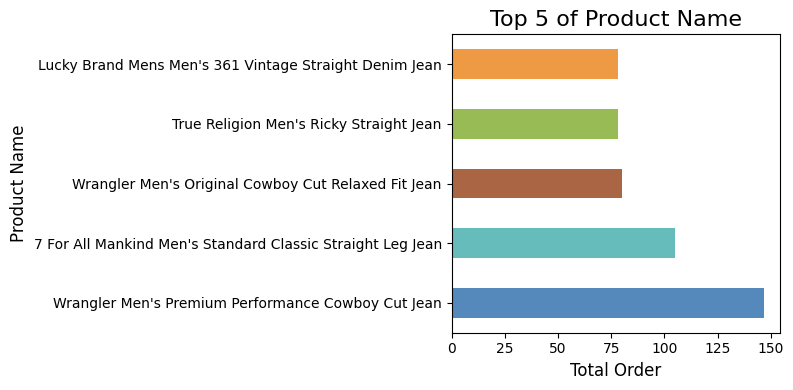

In [39]:
# Plotting the bar chart
plt.figure(figsize=(8, 4))
top_5_product_name.plot(kind='barh', color=colors[:len(top_5_product_name)])  # Adjust colors to the length of the data

# Adding labels and title
plt.title('Top 5 of Product Name', fontsize=16)
plt.xlabel('Total Order', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Here are insights from the product names and order data:

1. **Dominance of Wrangler**: The top two Wrangler products—*Wrangler Men's Premium Performance Cowboy Cut Jean* (147 orders) and *Wrangler Men's Original Cowboy Cut Relaxed Fit Jean* (80 orders)—are among the most ordered items. This shows a strong customer preference for Wrangler's brand and style, particularly their cowboy cut jeans, which suggests a significant customer segment favoring durable, rugged jeans.

2. **Popularity of High-End Denim**: *7 For All Mankind Men's Standard Classic Straight Leg Jean* (105 orders) and *True Religion Men's Ricky Straight Jean* (78 orders) show that premium denim brands are also highly favored by customers. These brands cater to a more fashion-conscious market, indicating a willingness among customers to invest in higher-priced jeans.

3. **Classic Denim Appeal**: All top 5 products are variations of straight or relaxed fit jeans, emphasizing that customers prefer classic, comfortable styles over more trendy or slim-fit jeans.

4. **Consistent Demand Across Brands**: The relatively even distribution of orders among these brands, with most items having between 78 and 147 orders, suggests that theLook eCommerce has a balanced appeal across multiple denim brands.

This indicates that **denim is a key product** category for the platform, with both affordable and premium brands in demand, especially among customers who prioritize quality and style.

### 5. What are the top 5 product brand based on total orders in theLook eCommerce?

In [33]:
top_5_product_brand = df_cleaned.groupby('product_brand')['order_id'].nunique().sort_values(ascending=False).head(5)
top_5_product_brand

,order_id
product_brand,
Allegra K,11796
Calvin Klein,6319
Carhartt,5135
Hanes,3945
Volcom,3791


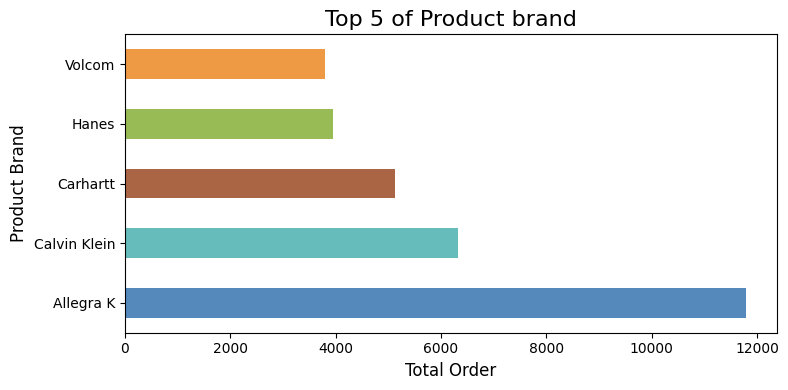

In [40]:
# Plotting the bar chart
plt.figure(figsize=(8, 4))
top_5_product_brand.plot(kind='barh', color=colors[:len(top_5_product_brand)])  # Adjust colors to the length of the data

# Adding labels and title
plt.title('Top 5 of Product brand', fontsize=16)
plt.xlabel('Total Order', fontsize=12)
plt.ylabel('Product Brand', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Here are insights based on the product brand and order data:

1. **Allegra K Dominates**: *Allegra K* is the leading brand with 11,796 orders, far surpassing other brands. This suggests that Allegra K's product line is highly popular among customers, potentially due to its wide range of offerings, affordable pricing, or appeal to a broad demographic. It may reflect the brand's effectiveness in meeting customer needs or trends.

2. **Strong Presence of Premium Brands**: *Calvin Klein* ranks second with 6,319 orders, indicating that customers are drawn to premium, well-established fashion brands. Calvin Klein's reputation for quality, particularly in categories like underwear and apparel, makes it a consistent choice for customers.

3. **Durability and Practicality Appeal**: *Carhartt* comes in third with 5,135 orders, known for its rugged, durable clothing. This suggests that a significant portion of customers are looking for practical, long-lasting workwear or outdoor gear, indicating the platform's appeal to both fashion and utility-oriented shoppers.

4. **Basic Essentials Popularity**: *Hanes*, with 3,945 orders, reflects the high demand for everyday essentials like undergarments and casual wear. This suggests that basic, affordable products are a key component of the platform's sales mix.

5. **Volcom's Niche Appeal**: *Volcom*, with 3,791 orders, appeals to customers looking for lifestyle and action-sports-oriented fashion. While not as high as other brands, its presence indicates niche market popularity within the platform.

Overall, **Allegra K leads by a large margin**, but premium and practical brands like Calvin Klein, Carhartt, Hanes, and Volcom also play significant roles, demonstrating a diverse range of customer preferences.

### 6. What are the top 5 countries based on total revenue for theLook eCommerce?

In [35]:
top_5_country = df_cleaned_revenue.groupby('country')['revenue'].sum().round(2).sort_values(ascending=False).head(5)
top_5_country

,revenue
country,
China,12742993.29
United States,8160354.20
Brasil,5364895.27
South Korea,1961635.67
France,1820167.43


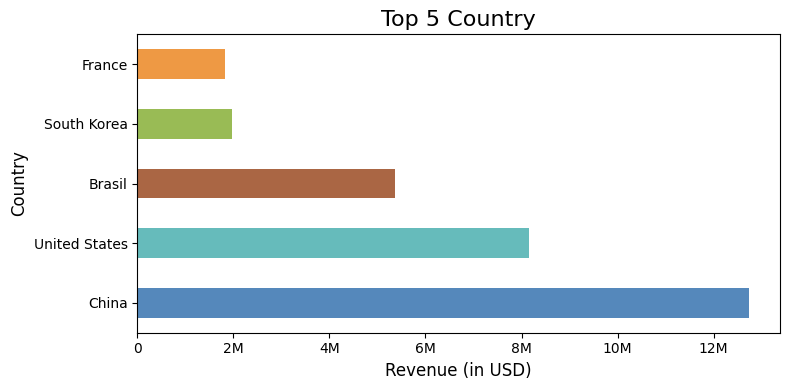

In [41]:
# Plotting the bar chart
plt.figure(figsize=(8, 4))
top_5_country.plot(kind='barh', color=colors[:len(top_5_country)])  # Adjust colors to the length of the data

# Adding labels and title
plt.title('Top 5 Country', fontsize=16)
plt.xlabel('Revenue (in USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Change format y-axis in %%M (%% million)
formatter = ticker.FuncFormatter(format_million_h)
plt.gca().xaxis.set_major_formatter(formatter)

# Display the plot
plt.tight_layout()
plt.show()

From the data:

1. **China** is the top revenue-generating country for theLook eCommerce, contributing significantly with a revenue of approximately **12.74 million**.
2. The **United States** follows with a notable revenue of **8.16 million**, making it the second-largest market.
3. **Brasil** ranks third, generating around **5.36 million**, showing strong performance in the South American region.
4. **South Korea** and **France** contribute smaller, yet substantial revenues of **1.96 million** and **1.82 million** respectively.

The data highlights that **China** and the **United States** are the company's strongest markets, while there is notable traction in emerging markets like **Brasil**.